## <p style="text-align: center;">ATIVIDADE 2</p>

<p style="text-align: center;">Aprendizado de máquina para criar um modelo que prevê quais passageiros sobreviveram ao naufrágio do Titanic.</p>

#### <p style="text-align: right;">referência: https://www.kaggle.com/competitions/titanic/overview

### <p style="text-align: center;">O DESAFIO</p>

<p style="text-align: justify;">   O naufrágio do Titanic é um dos naufrágios mais infames da história. Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado “inafundável” RMS Titanic afundou após colidir com um iceberg.</p>
    
<p style="text-align: justify;">   Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes. Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.</p>
    
<p style="text-align: justify;">   Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoa tem maior probabilidade de sobreviver?” usando os dados do passageiro (ou seja, nome, idade, sexo, classe socioeconômica, etc).</p>

In [1]:
!pip3 install --upgrade pip

#### Titanic Tutorial - https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [3]:
cwd = os.getcwd()

In [4]:
cwd

'C:\\Jupyter\\I2A2\\titanic'

In [5]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk(cwd + '/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Jupyter\I2A2\titanic/titanic\CamposRodriguezLauraAlejandra2020.pdf
C:\Jupyter\I2A2\titanic/titanic\gender_submission.csv
C:\Jupyter\I2A2\titanic/titanic\sample-out.png
C:\Jupyter\I2A2\titanic/titanic\submission.csv
C:\Jupyter\I2A2\titanic/titanic\test.csv
C:\Jupyter\I2A2\titanic/titanic\train.csv
C:\Jupyter\I2A2\titanic/titanic\tree1.dot
C:\Jupyter\I2A2\titanic/titanic\tree1.png


In [6]:
cwd

'C:\\Jupyter\\I2A2\\titanic'

In [7]:
train_data = pd.read_csv(cwd + '/titanic/train.csv')

In [8]:
train_data.shape

(891, 12)

In [9]:
print('O número de amostras dentro do dataset train é {}.'.format(train_data.shape[0]))

O número de amostras dentro do dataset train é 891.


In [10]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

In [11]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
test_data = pd.read_csv(cwd + '/titanic/test.csv')

In [13]:
test_data.shape

(418, 11)

In [14]:
print('O número de amostras dentro do dataset test é {}.'.format(test_data.shape[0]))

O número de amostras dentro do dataset test é 418.


In [15]:
test_data.index

RangeIndex(start=0, stop=418, step=1)

In [16]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [17]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("Percentual de sobreviventes mulheres: {:,.2f}".format(rate_women*100),"%")

Percentual de sobreviventes mulheres: 74.20 %


In [18]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("Percentual de sobreviventes homens: {:,.2f}".format(rate_men*100),"%")

Percentual de sobreviventes homens: 18.89 %


In [19]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [20]:
# Importing important libraries to analyze the data
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
'''

"\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport warnings\nimport plotly.express as px\nwarnings.filterwarnings('ignore')\n%matplotlib inline\n"

In [21]:
train_data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [22]:
test_data.set_index('PassengerId')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [23]:
# A nice data dictionary will help us better understand the data

data ={'Variable' : ['survival', 'pclass','sex','Age','sibsp','parch','ticket','fare','cabin','embarked'],
    'Definition' : ['Sobrevivente','Classe_do_passagem','Sexo','Idade','familiares_no_titanic','parentes_no_titanic','Numero_da_passagem','Tarifa_do_passagerio','Numero_da_cabine','Porto_de_embarque']}

Data_Dictionary = pd.DataFrame(data = data,columns=['Variable','Definition','Key'])
Data_Dictionary.fillna(' ', inplace=True)

Data_Dictionary.Key[0] = 'Nao -> 0, Sim -> 1'
Data_Dictionary.Key[1] = '1 = 1°, 2 = 2°, 3 = 3°'
Data_Dictionary.Key[9] = 'C = Cherbourg, Q = Queenstown, S = Southampton'

In [24]:
Data_Dictionary

,Variable,Definition,Key
0,survival,Sobrevivente,"Nao -> 0, Sim -> 1"
1,pclass,Classe_do_passagem,"1 = 1°, 2 = 2°, 3 = 3°"
2,sex,Sexo,
3,Age,Idade,
4,sibsp,familiares_no_titanic,
5,parch,parentes_no_titanic,
6,ticket,Numero_da_passagem,
7,fare,Tarifa_do_passagerio,
8,cabin,Numero_da_cabine,
9,embarked,Porto_de_embarque,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [29]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [31]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
# check data for NA values

train_NA = train_data.isna().sum()
test_NA = test_data.isna().sum()

pd.concat([train_NA, test_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA'])

,Train NA,Test NA
PassengerId,0,0.0
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,86.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,1.0


In [34]:
# percent of missing "Age" 
print('Percentual de registros de "idades" faltantes é %.2f%%' %((train_data['Age'].isnull().sum()/train_data.shape[0])*100))

Percentual de registros de "idades" faltantes é 19.87%


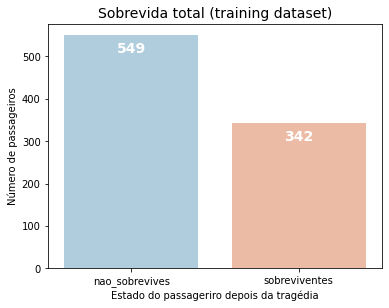

In [35]:
# set size of the plot
plt.figure(figsize=(6, 4.5)) 

# countplot shows the counts of observations in each categorical bin using bars.
# x - name of the categorical variable
ax = sns.countplot(x = 'Survived', data = train_data, palette='RdBu_r')

# set the current tick locations and labels of the x-axis.
plt.xticks( np.arange(2), ['nao_sobrevives', 'sobreviventes'] )
# set title
plt.title('Sobrevida total (training dataset)',fontsize= 14)
# set x label
plt.xlabel('Estado do passageriro depois da tragédia')
# set y label
plt.ylabel('Número de passageiros')

# calculate passengers for each category
labels = (train_data['Survived'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
    
plt.show()


Text(0, 0.5, 'Número de passageiros')

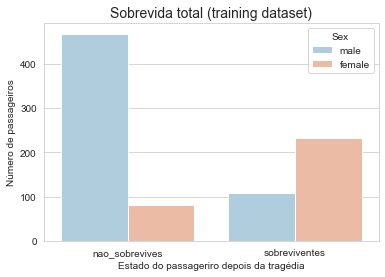

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data,palette='RdBu_r')

# set the current tick locations and labels of the x-axis.
plt.xticks( np.arange(2), ['nao_sobrevives', 'sobreviventes'] )
# set title
plt.title('Sobrevida total (training dataset)',fontsize= 14)
# set x label
plt.xlabel('Estado do passageriro depois da tragédia')
# set y label
plt.ylabel('Número de passageiros')

In [37]:
train_data['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [38]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [39]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [40]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [41]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


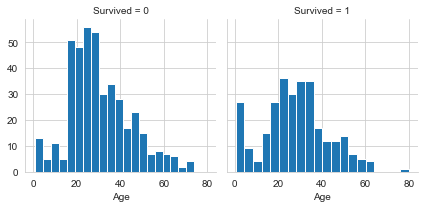

In [42]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<AxesSubplot: xlabel='Survived', ylabel='count'>

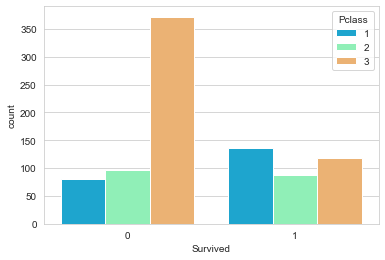

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow')

<AxesSubplot: >

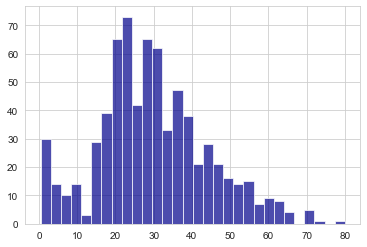

In [44]:
train_data['Age'].hist(bins=30,color='darkblue',alpha=0.7)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

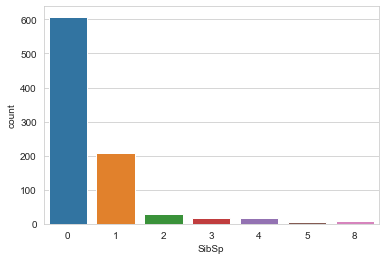

In [45]:
sns.countplot(x='SibSp',data=train_data)

<AxesSubplot: xlabel='Parch', ylabel='count'>

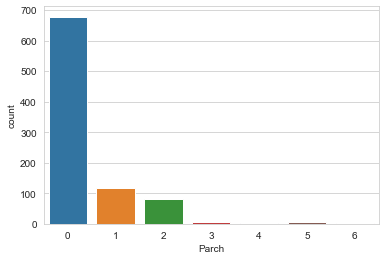

In [46]:
sns.countplot(x='Parch',data=train_data)

<AxesSubplot: >

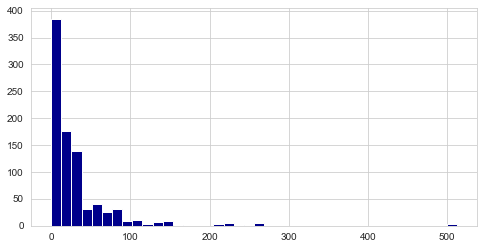

In [47]:
train_data['Fare'].hist(color='darkblue',bins=40,figsize=(8,4))

20% das entradas para a idade do passageiro estão faltando. Vamos ver como a variável 'Idade' se parece em geral.

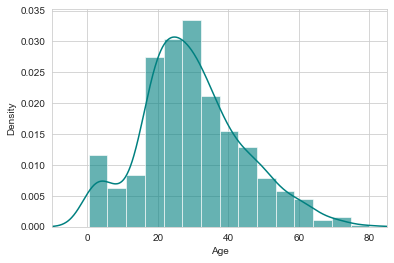

In [48]:
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Como "Idade" é (à direita) distorcida, usar a média pode nos dar resultados tendenciosos ao preencher as idades mais antigas do que o desejado. Para lidar com isso, usaremos a mediana para imputar os valores ausentes.

In [49]:
# mean age
print('A média da idade é %.2f anos' %(train_data["Age"].mean(skipna=True)))
# median age
print('A médiana da idade é %.2f anos' %(train_data["Age"].median(skipna=True)))

A média da idade é 29.70 anos
A médiana da idade é 28.00 anos


In [50]:
# percent of missing "Cabin" 
print('Porcentagem de "Cabines" sem registro é de %.2f%%' %((train_data['Cabin'].isnull().sum()/train_data.shape[0])*100))

Porcentagem de "Cabines" sem registro é de 77.10%


In [51]:
# percent of missing "Embarked" 
print('Porcentagem de "Porto de embarque" sem registro é de %.2f%%' %((train_data['Embarked'].isnull().sum()/train_data.shape[0])*100))

Porcentagem de "Porto de embarque" sem registro é de 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


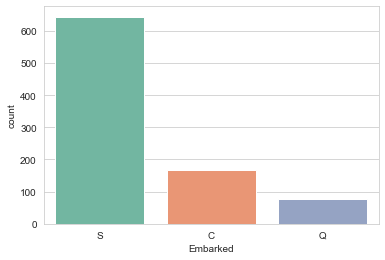

In [52]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_data['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_data, palette='Set2')
plt.show()

In [53]:
print('O porto com o maior número de embarcados %s (C = Cherbourg, Q = Queenstown, S = Southampton).' %train_data['Embarked'].value_counts().idxmax())

O porto com o maior número de embarcados S (C = Cherbourg, Q = Queenstown, S = Southampton).


In [54]:
!pip3 install xgboost

In [55]:
# Imports needed for the script
#import numpy as np
#import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from IPython.display import Image

In [56]:
# Store our test passenger IDs for easy access
PassengerId = test_data['PassengerId']

In [57]:
# Copy original dataset in case we need it later when digging into interesting features
# WARNING: Beware of actually copying the dataframe instead of just referencing it
# "original_train = train" will create a reference to the train variable (changes in 'train' will apply to 'original_train')
original_train = train_data.copy() # Using 'copy()' allows to clone the dataset, creating a different object with the same values

# Feature engineering steps taken from Sina and Anisotropic, with minor changes to avoid warnings
full_data = [train_data, test_data]

# Feature that tells whether a passenger had a cabin on the Titanic
train_data['Has_Cabin'] = train_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_data['Has_Cabin'] = test_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_data['Fare'].median())

# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;

In [58]:
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train_data = train_data.drop(drop_elements, axis = 1)
test_data  = test_data.drop(drop_elements, axis = 1)

<AxesSubplot: title={'center': 'Correlação de características de Pearson'}>

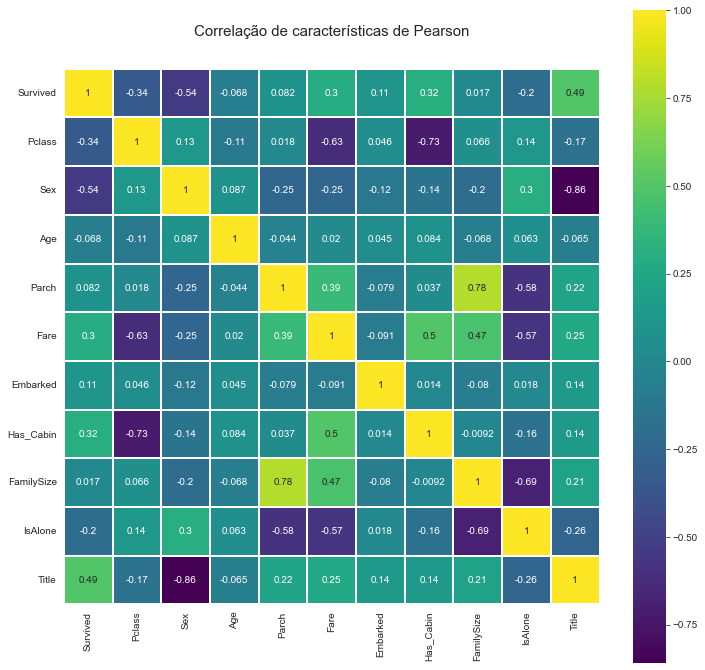

In [59]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlação de características de Pearson', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [60]:
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])
# Since "Survived" is a binary class (0 or 1), these metrics grouped by the Title feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived

# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

Survived           
           mean count  sum
Title                     
1      0.156673   517   81
2      0.575000    40   23
3      0.793651   126  100
4      0.702703   185  130
5      0.347826    23    8

In [61]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])
# Since Survived is a binary feature, this metrics grouped by the Sex feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived
    
# sex_mapping = {{'female': 0, 'male': 1}} 

Survived           
         mean count  sum
Sex                     
0    0.742038   314  233
1    0.188908   577  109

In [62]:
# Let's use our 'original_train' dataframe to check the sex distribution for each title.
# We use copy() again to prevent modifications in out original_train dataset
title_and_sex = original_train.copy()[['Name', 'Sex']]

# Create 'Title' feature
title_and_sex['Title'] = title_and_sex['Name'].apply(get_title)

# Map 'Sex' as binary feature
title_and_sex['Sex'] = title_and_sex['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Table with 'Sex' distribution grouped by 'Title'
title_and_sex[['Title', 'Sex']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

# Since Sex is a binary feature, this metrics grouped by the Title feature represent:
    # MEAN: percentage of men
    # COUNT: total observations
    # SUM: number of men

Sex           
              mean count  sum
Title                        
Capt      1.000000     1    1
Col       1.000000     2    2
Countess  0.000000     1    0
Don       1.000000     1    1
Dr        0.857143     7    6
Jonkheer  1.000000     1    1
Lady      0.000000     1    0
Major     1.000000     2    2
Master    1.000000    40   40
Miss      0.000000   182    0
Mlle      0.000000     2    0
Mme       0.000000     1    0
Mr        1.000000   517  517
Mrs       0.000000   125    0
Ms        0.000000     1    0
Rev       1.000000     6    6
Sir       1.000000     1    1

In [63]:
# Define function to calculate Gini Impurity
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity

In [64]:
# Gini Impurity of starting node
gini_impurity_starting_node = get_gini_impurity(342, 891)
gini_impurity_starting_node

0.47301295786144265

In [65]:
# Gini Impurity decrease of node for 'male' observations
gini_impurity_men = get_gini_impurity(109, 577)
gini_impurity_men

0.3064437162277843

In [66]:
# Gini Impurity decrease if node splited for 'female' observations
gini_impurity_women = get_gini_impurity(233, 314)
gini_impurity_women

0.3828350034484158

In [67]:
# Gini Impurity decrease if node splited by Sex
men_weight = 577/891
women_weight = 314/891
weighted_gini_impurity_sex_split = (gini_impurity_men * men_weight) + (gini_impurity_women * women_weight)

sex_gini_decrease = weighted_gini_impurity_sex_split - gini_impurity_starting_node
sex_gini_decrease

-0.13964795747285214

In [68]:
# Gini Impurity decrease of node for observations with Title == 1 == Mr
gini_impurity_title_1 = get_gini_impurity(81, 517)
gini_impurity_title_1

0.26425329886377663

In [69]:
# Gini Impurity decrease if node splited for observations with Title != 1 != Mr
gini_impurity_title_others = get_gini_impurity(261, 374)
gini_impurity_title_others

0.42170207898424317

In [70]:
# Gini Impurity decrease if node splited for observations with Title == 1 == Mr
title_1_weight = 517/891
title_others_weight = 374/891
weighted_gini_impurity_title_split = (gini_impurity_title_1 * title_1_weight) + (gini_impurity_title_others * title_others_weight)

title_gini_decrease = weighted_gini_impurity_title_split - gini_impurity_starting_node
title_gini_decrease

-0.14267004758907514

In [71]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test_data))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train_data):
        f_train = train_data.loc[train_fold] # Extract train data with cv indices
        f_valid = train_data.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.782285
         2          0.799189
         3          0.828277
         4          0.819288
         5          0.815968
         6          0.802522
         7          0.803620
         8          0.803633
         9          0.804769
        10          0.807016


In [72]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train_data['Survived']
x_train = train_data.drop(['Survived'], axis=1).values 
x_test = test_data.values

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train_data.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )

In [73]:
import os
from subprocess import check_call

def post_save(model, os_path, contents_manager):
    """post-save hook for converting notebooks to .py scripts"""
    if model['type'] != 'notebook':
        return # only do this for notebooks
    d, fname = os.path.split(os_path)
    check_call(['dot', '-Tpng', 'tree1.dot', '-o','tree1.png',fname], cwd=d)

#c = get_config()
#c.FileContentsManager.post_save_hook = post_save

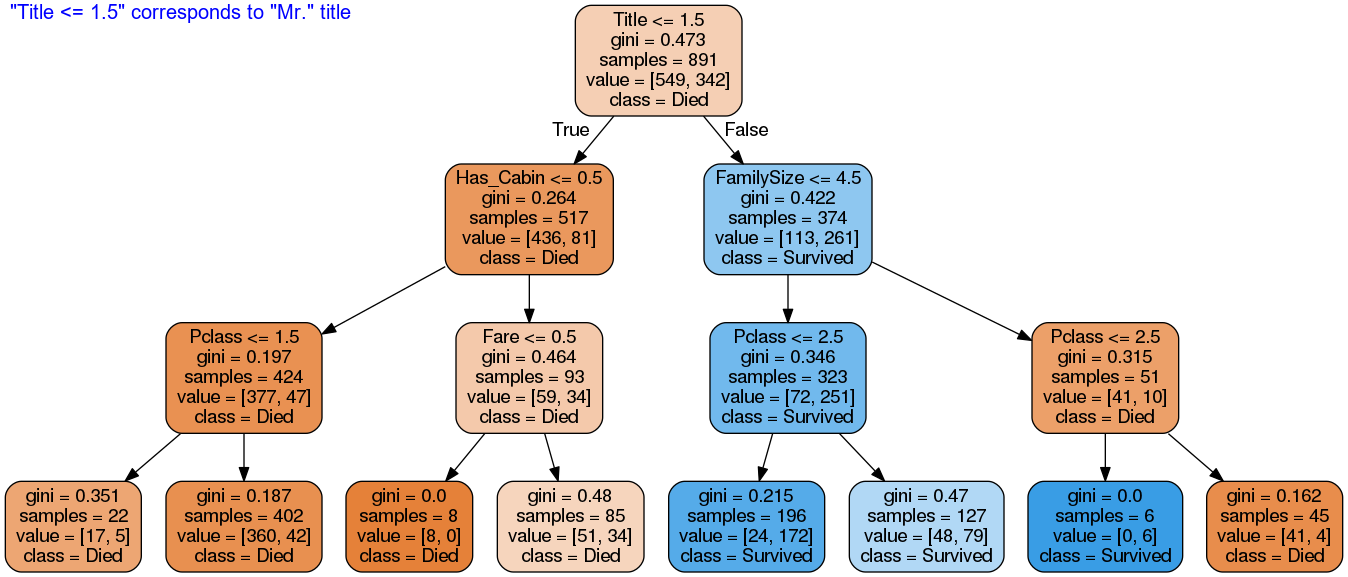

In [74]:
from PIL import Image
import PIL.Image

# Annotating chart with PIL
fp = open(cwd + "/tree1.png","rb")
img = PIL.Image.open(fp)
draw = ImageDraw.Draw(img)
font1 = ImageFont.truetype("arial.ttf",20)
draw.text((10, 0), # Drawing offset (position)
          '"Title <= 1.5" corresponds to "Mr." title', # Text to draw
          (0,0,255), # RGB desired color
          font=font1) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")

# Code to check available fonts and respective paths
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [75]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print('Acuracidade da árvore de decisão é de',acc_decision_tree,'%')

Acuracidade da árvore de decisão é de 82.38 %


Futuras melhorias - Referências

https://www.kaggle.com/code/datafan07/titanic-eda-and-several-modelling-approaches

https://www.kaggle.com/code/ialimustufa/titanic-beginner-s-guide-with-sklearn
    
https://www.kaggle.com/code/sgus1318/titanic-analysis-learning-to-swim-with-python

https://www.kaggle.com/code/onedatareader/titanic-data-analysis
    
https://www.kaggle.com/code/erikbruin/titanic-2nd-degree-families-and-majority-voting

https://www.kaggle.com/code/vbmokin/titanic-0-83253-comparison-20-popular-models
    
https://www.kaggle.com/code/jamesleslie/titanic-eda-wrangling-imputation
    
https://www.kaggle.com/code/husnakhan/titanic-survival-eda-classification-imputation

https://www.kaggle.com/code/fatmakursun/titanic-classification-models

https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python

https://www.kaggle.com/code/vinothan/titanic-model-with-90-accuracy
    
https://www.kaggle.com/code/zlatankr/titanic-random-forest-82-78

https://www.kaggle.com/code/nhlr21/complete-titanic-tutorial-with-ml-nn-ensembling

https://www.kaggle.com/code/vbmokin/titanic-top-3-cluster-analysis

https://www.kaggle.com/code/pavlofesenko/selling-life-insurance-to-titanic-passengers

Nova proposta

https://www.kaggle.com/code/hillabehar/titanic-analysis-with-r
